In [22]:
import pandas as pd
from itables import init_notebook_mode, show
import nltk
import matplotlib.pyplot as plt
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [23]:
u1df = pd.read_csv('9May2022-val-preds-t5-small+min-adult-utt-1+young.csv')
u4df = pd.read_csv('9May2022-val-preds-t5-small+min-adult-utt-4+young.csv')

u1df['parent_gloss_len'] = [len(nltk.word_tokenize(u)) for u in u1df['input']]
u4df['parent_gloss_len'] = [len(nltk.word_tokenize(u)) for u in u4df['input']]

In [24]:
show(u1df, maxBytes=0)

In [20]:
show(u4df, maxBytes=0)

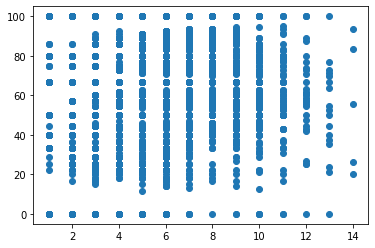

In [25]:
plt.scatter(u1df['parent_gloss_len'], u1df['rougeL'])

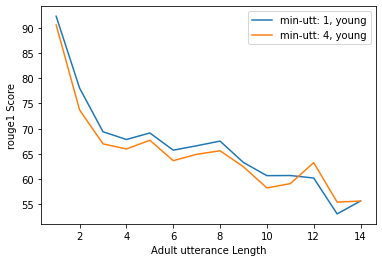

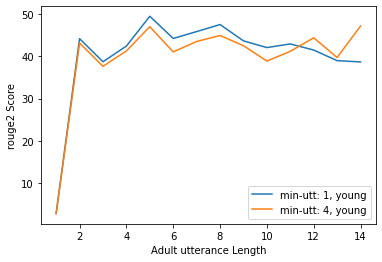

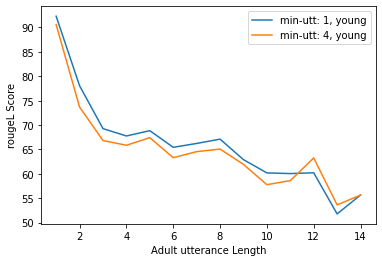

In [51]:
for rouge in ['rouge1', 'rouge2', 'rougeL']:
    plt.figure()
    gloss_rouge_u1 = u1df.groupby('parent_gloss_len')[rouge].mean()
    plt.plot(gloss_rouge_u1.index, gloss_rouge_u1, label='min-utt: 1, young')
    gloss_rouge_u4 = u4df.groupby('parent_gloss_len')[rouge].mean()
    plt.plot(gloss_rouge_u4.index, gloss_rouge_u4, label='min-utt: 4, young')

    plt.xlabel('Adult utterance Length')
    plt.ylabel(f'{rouge} Score')
    plt.legend()
    plt.savefig(f'uttlen_vs_{rouge}.png')

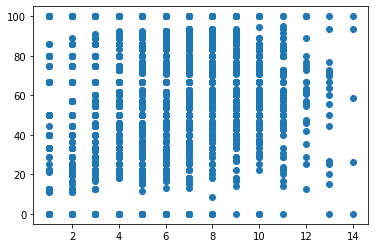

In [27]:
plt.scatter(u4df['parent_gloss_len'], u4df['rougeL'])

In [47]:
u1df.query('rouge1 <= 20').sample(10)

input                   pred  \
16129                               right Lily                   Lily   
8782                               right doggy                  doggy   
506                   whadda you think it says                 whadda   
14918                                  the top                    top   
6026                                 here I go            here you go   
10476  it's a cold day today that's why he had  it's a cold day today   
4332                         oh you're welcome            I'm welcome   
12626                   mic Mommy's microphone             microphone   
981                                  yeah whoa                   whoa   
7026              uhhuh uhhuh uhhuh here it is            uhhuh uhhuh   

                                      label   rouge1  rouge2   rougeL  \
16129                                 right   0.0000     0.0   0.0000   
8782                                  a dog   0.0000     0.0   0.0000   
506                         what's that say   0.0000     0.0   0.0000   
14918  wh where is the top where is the top  20.0000     0.0  20.0000   
6026                                I'm xxx   0.0000     0.0   0.0000   
10476                 why did he have it on  16.6667     0.0  16.6667   
4332                              thank you   0.0000     0.0   0.0000   
12626                         Mommy's phone   0.0000     0.0   0.0000   
981                                    yeah   0.0000     0.0   0.0000   
7026                       all the red ones   0.0000     0.0   0.0000   

       parent_gloss_len  
16129                 2  
8782                  2  
506                   5  
14918                 2  
6026                  3  
10476                11  
4332                  4  
12626                 4  
981                   2  
7026                  6

In [48]:
u1df.query('rouge1 >= 80').sample(10)

input                         pred  \
8023                                  duck                         duck   
2717                                oh_boy                       oh_boy   
3349     it dropped in the water didn't it      it dropped in the water   
16090        that's right it's apple juice                  apple juice   
2501                             that's it                    that's it   
12386                    knock at the door                   knock door   
6399                             bang head                    bang head   
12642                            two birds                    two birds   
5721   is that old Tyke_Bike getting fixed  old Tyke_Bike getting fixed   
12134                      you wanna do it                I wanna do it   

                                  label    rouge1    rouge2    rougeL  \
8023                               duck  100.0000    0.0000  100.0000   
2717                             oh_boy  100.0000  100.0000  100.0000   
3349             they drop in the water   80.0000   75.0000   80.0000   
16090                       apple juice  100.0000  100.0000  100.0000   
2501                          that's it  100.0000  100.0000  100.0000   
12386                      knock a door   80.0000    0.0000   80.0000   
6399                       oh bang head   80.0000   66.6667   80.0000   
12642                          two bird  100.0000  100.0000  100.0000   
5721   that old Tyke_Bike getting fixed   90.9091   88.8889   90.9091   
12134               I get I wanna do it   80.0000   75.0000   80.0000   

       parent_gloss_len  
8023                  1  
2717                  1  
3349                  8  
16090                 7  
2501                  3  
12386                 4  
6399                  2  
12642                 2  
5721                  6  
12134                 5